# FE_과제

https://www.kaggle.com/fedesoriano/stellar-classification-dataset-sdss17</br>

Stellar Classification Dataset - SDSS17 </br>
Classification of Stars, Galaxies and Quasars. Sloan Digital Sky Survey DR17


In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#경고 문구 무시
import warnings
warnings.filterwarnings('ignore')

#matplotlib 스타일 정의
plt.style.use('fivethirtyeight')

In [3]:
# Mount google drive
from google.colab import drive
drive.mount('/content/gdrive')

# Import star_classification.csv
star = pd.read_csv('/content/gdrive/My Drive/ybigta_교육세션/04_FE/star_classification.csv')
star.head()

Mounted at /content/gdrive


,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


# 1. Imputing

우선 Null값 비중을 확인한 결과

In [4]:
star.isna().sum()/len(star)*100

obj_ID         0.0
alpha          0.0
delta          0.0
u              0.0
g              0.0
r              0.0
i              0.0
z              0.0
run_ID         0.0
rerun_ID       0.0
cam_col        0.0
field_ID       0.0
spec_obj_ID    0.0
class          0.0
redshift       0.0
plate          0.0
MJD            0.0
fiber_ID       0.0
dtype: float64

아주 우연찮게 Null값이 하나도 없었습니다... 정말이에요...

# 2. Encoding

In [5]:
star.dtypes

obj_ID         float64
alpha          float64
delta          float64
u              float64
g              float64
r              float64
i              float64
z              float64
run_ID           int64
rerun_ID         int64
cam_col          int64
field_ID         int64
spec_obj_ID    float64
class           object
redshift       float64
plate            int64
MJD              int64
fiber_ID         int64
dtype: object

dtype이 object인 class를 없애주려고 합니다.

In [6]:
print('class', star['class'].nunique())

class 3


In [8]:
print(star['class'].unique())

['GALAXY' 'QSO' 'STAR']


순서가 없는 3가지이므로, 원핫 인코딩을 해주려고 합니다.

In [30]:
class_type = ['GALAXY', 'QSO', 'STAR']
for c in class_type:
    star['class'+'_'+c] = np.where(star['class']==c,1,0)
star_obj_removed = star.drop(['class', 'class_GALAXYQSOSTAR'], axis=1)

In [31]:
star_obj_removed

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID,class_GALAXY,class_QSO,class_STAR
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,0.634794,5812,56354,171,1,0,0
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,0.779136,10445,58158,427,1,0,0
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,0.644195,4576,55592,299,1,0,0
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,0.932346,9149,58039,775,1,0,0
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,0.116123,6121,56187,842,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,0.000000,9374,57749,438,1,0,0
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,0.404895,7626,56934,866,1,0,0
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,0.143366,2764,54535,74,1,0,0
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,0.455040,6751,56368,470,1,0,0


# 3. Outlier removing

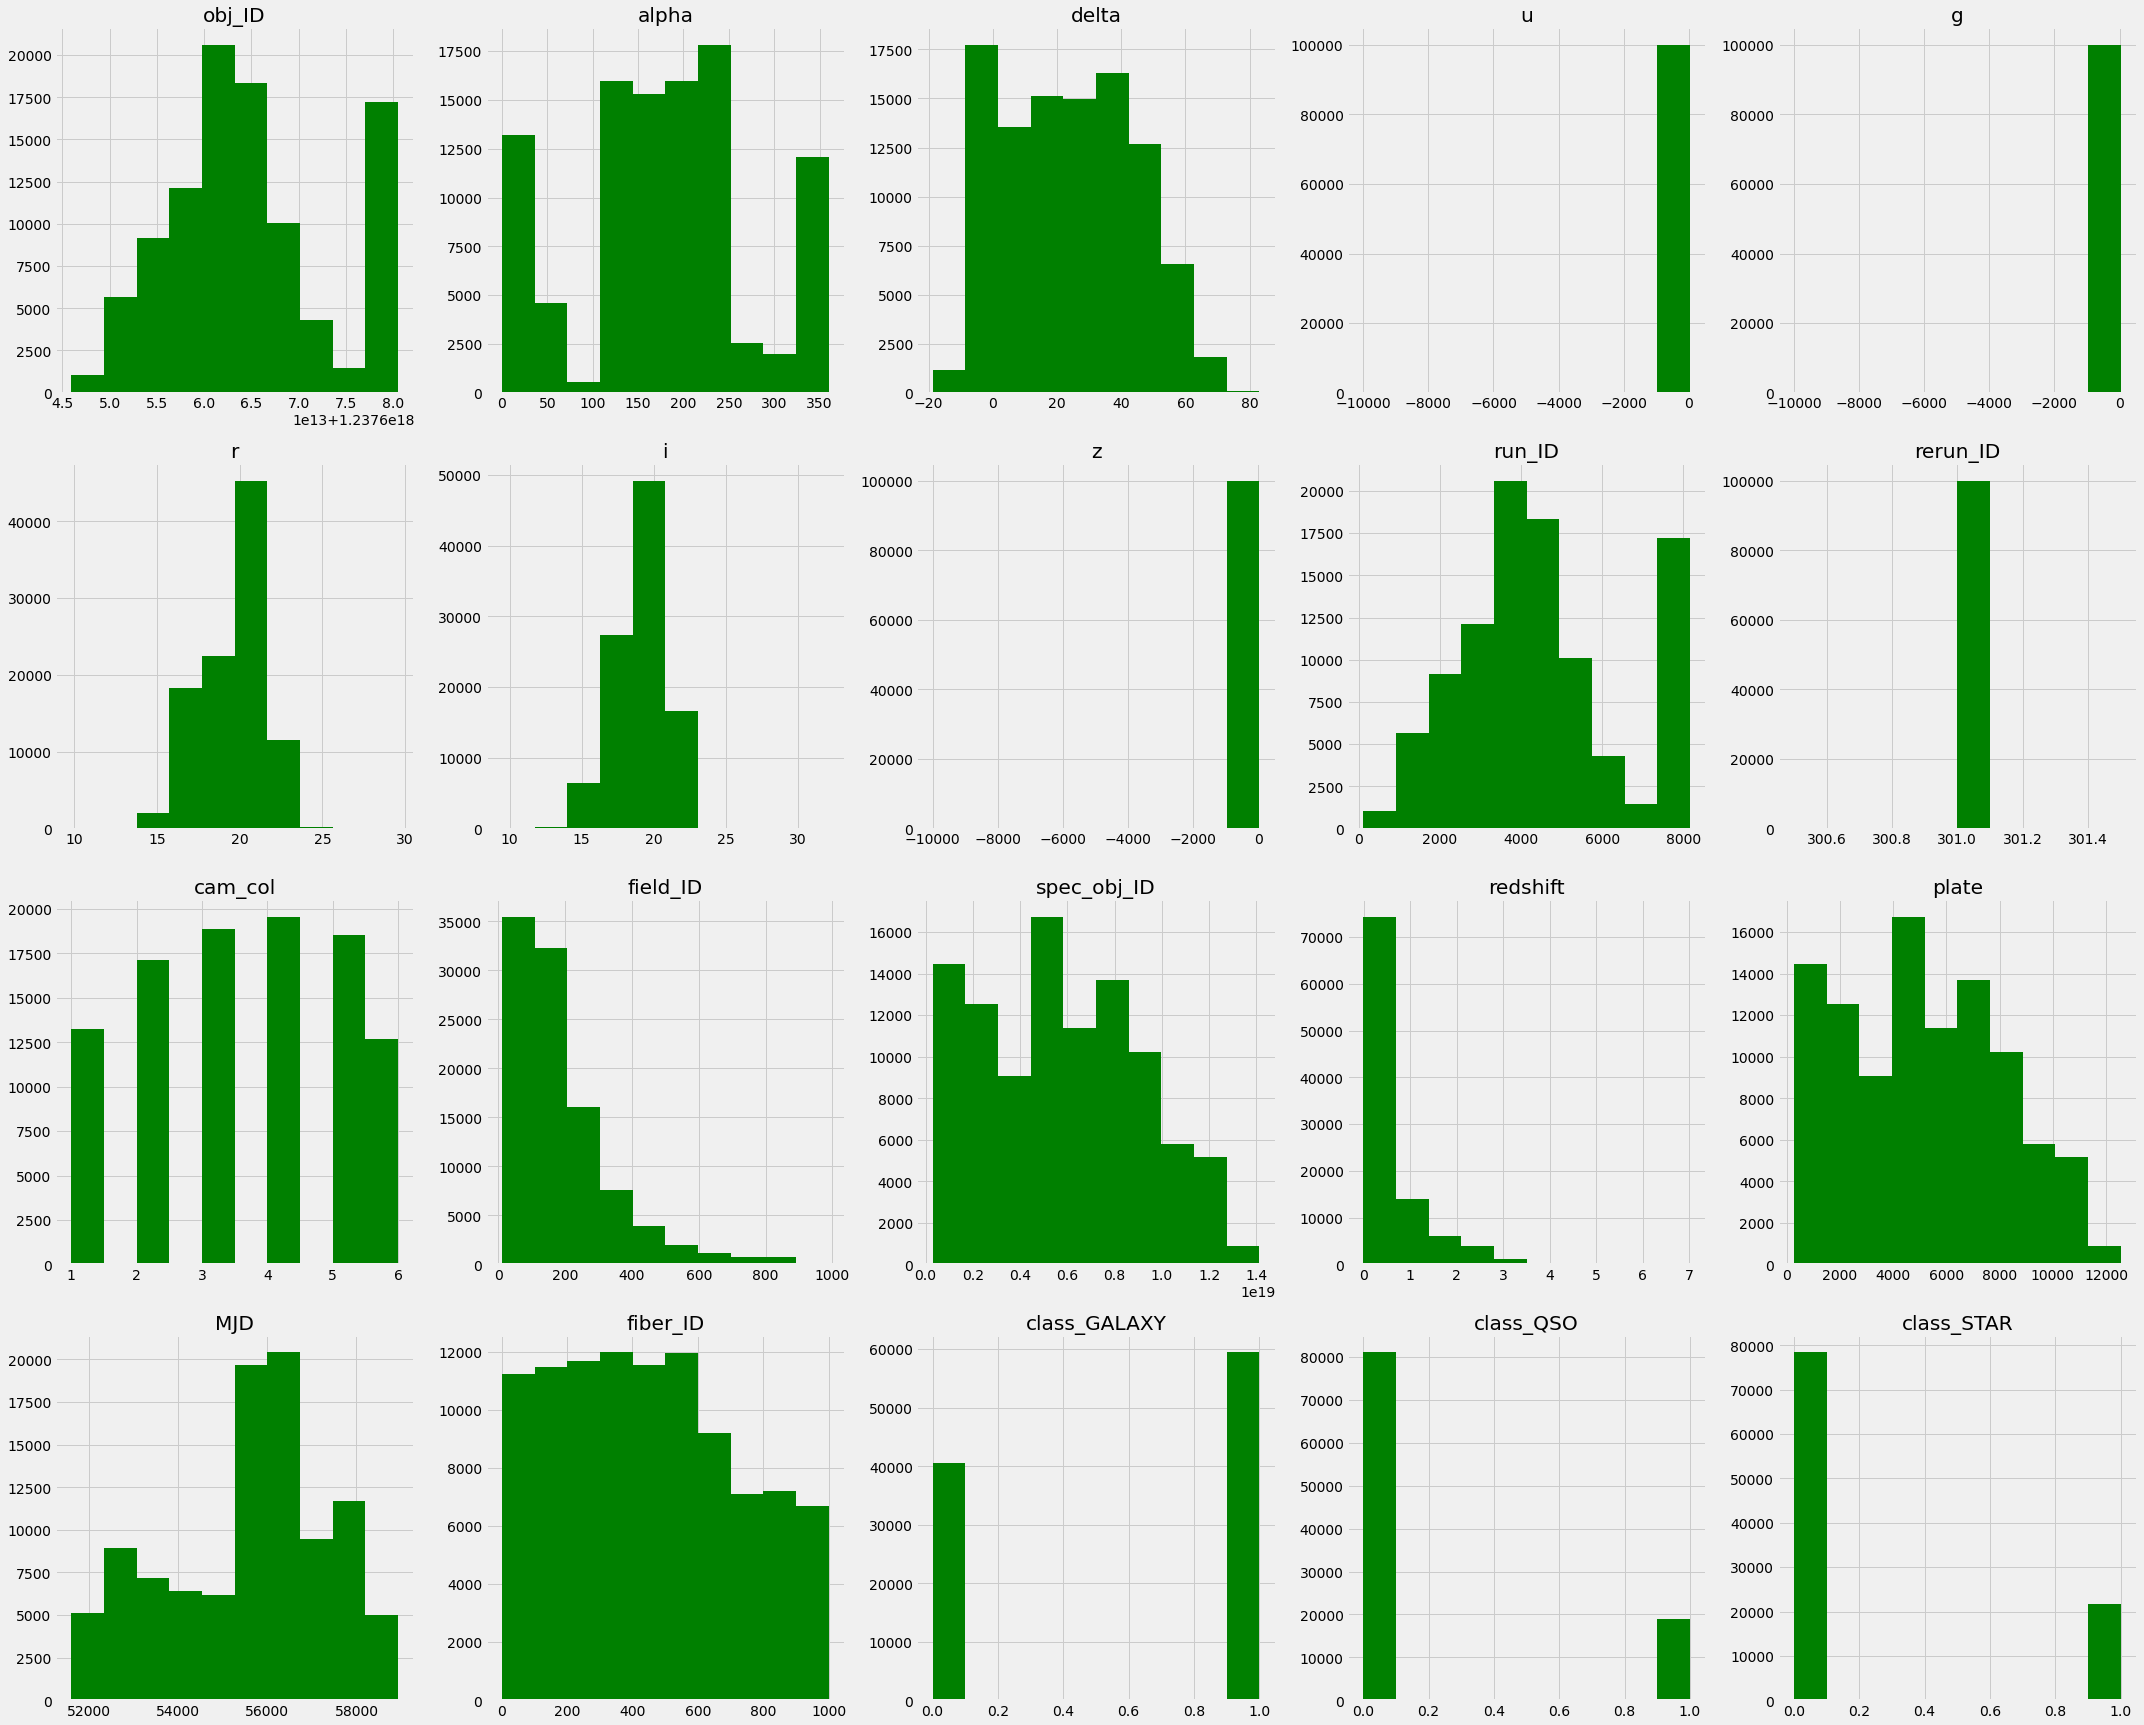

In [32]:
plt.figure(figsize=(30,30))
for i, col in enumerate(star_obj_removed.columns.to_list()):
    plt.subplot(5, 5, i + 1)
    plt.hist(star_obj_removed[col], label=col,color='green')
    plt.title(col)
    plt.tight_layout()

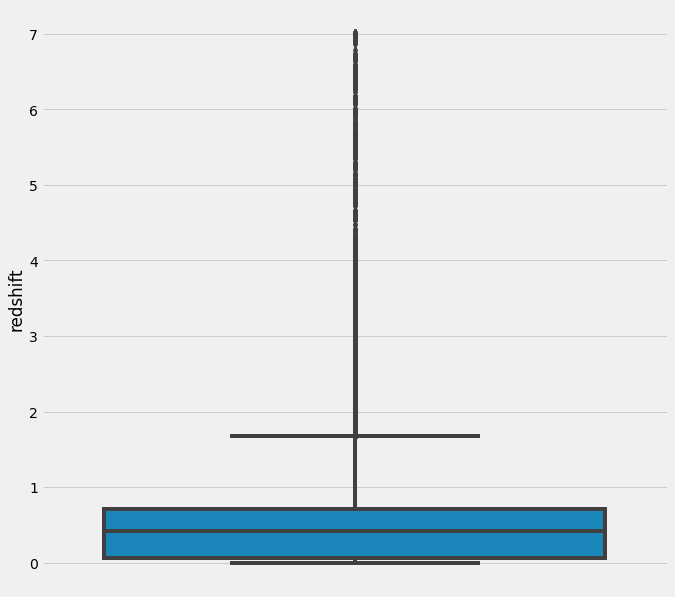

In [33]:
plt.figure(figsize=(10,10))
sns.boxplot(data=star_obj_removed, y='redshift')

outlier....?

# 4. Correlation removing

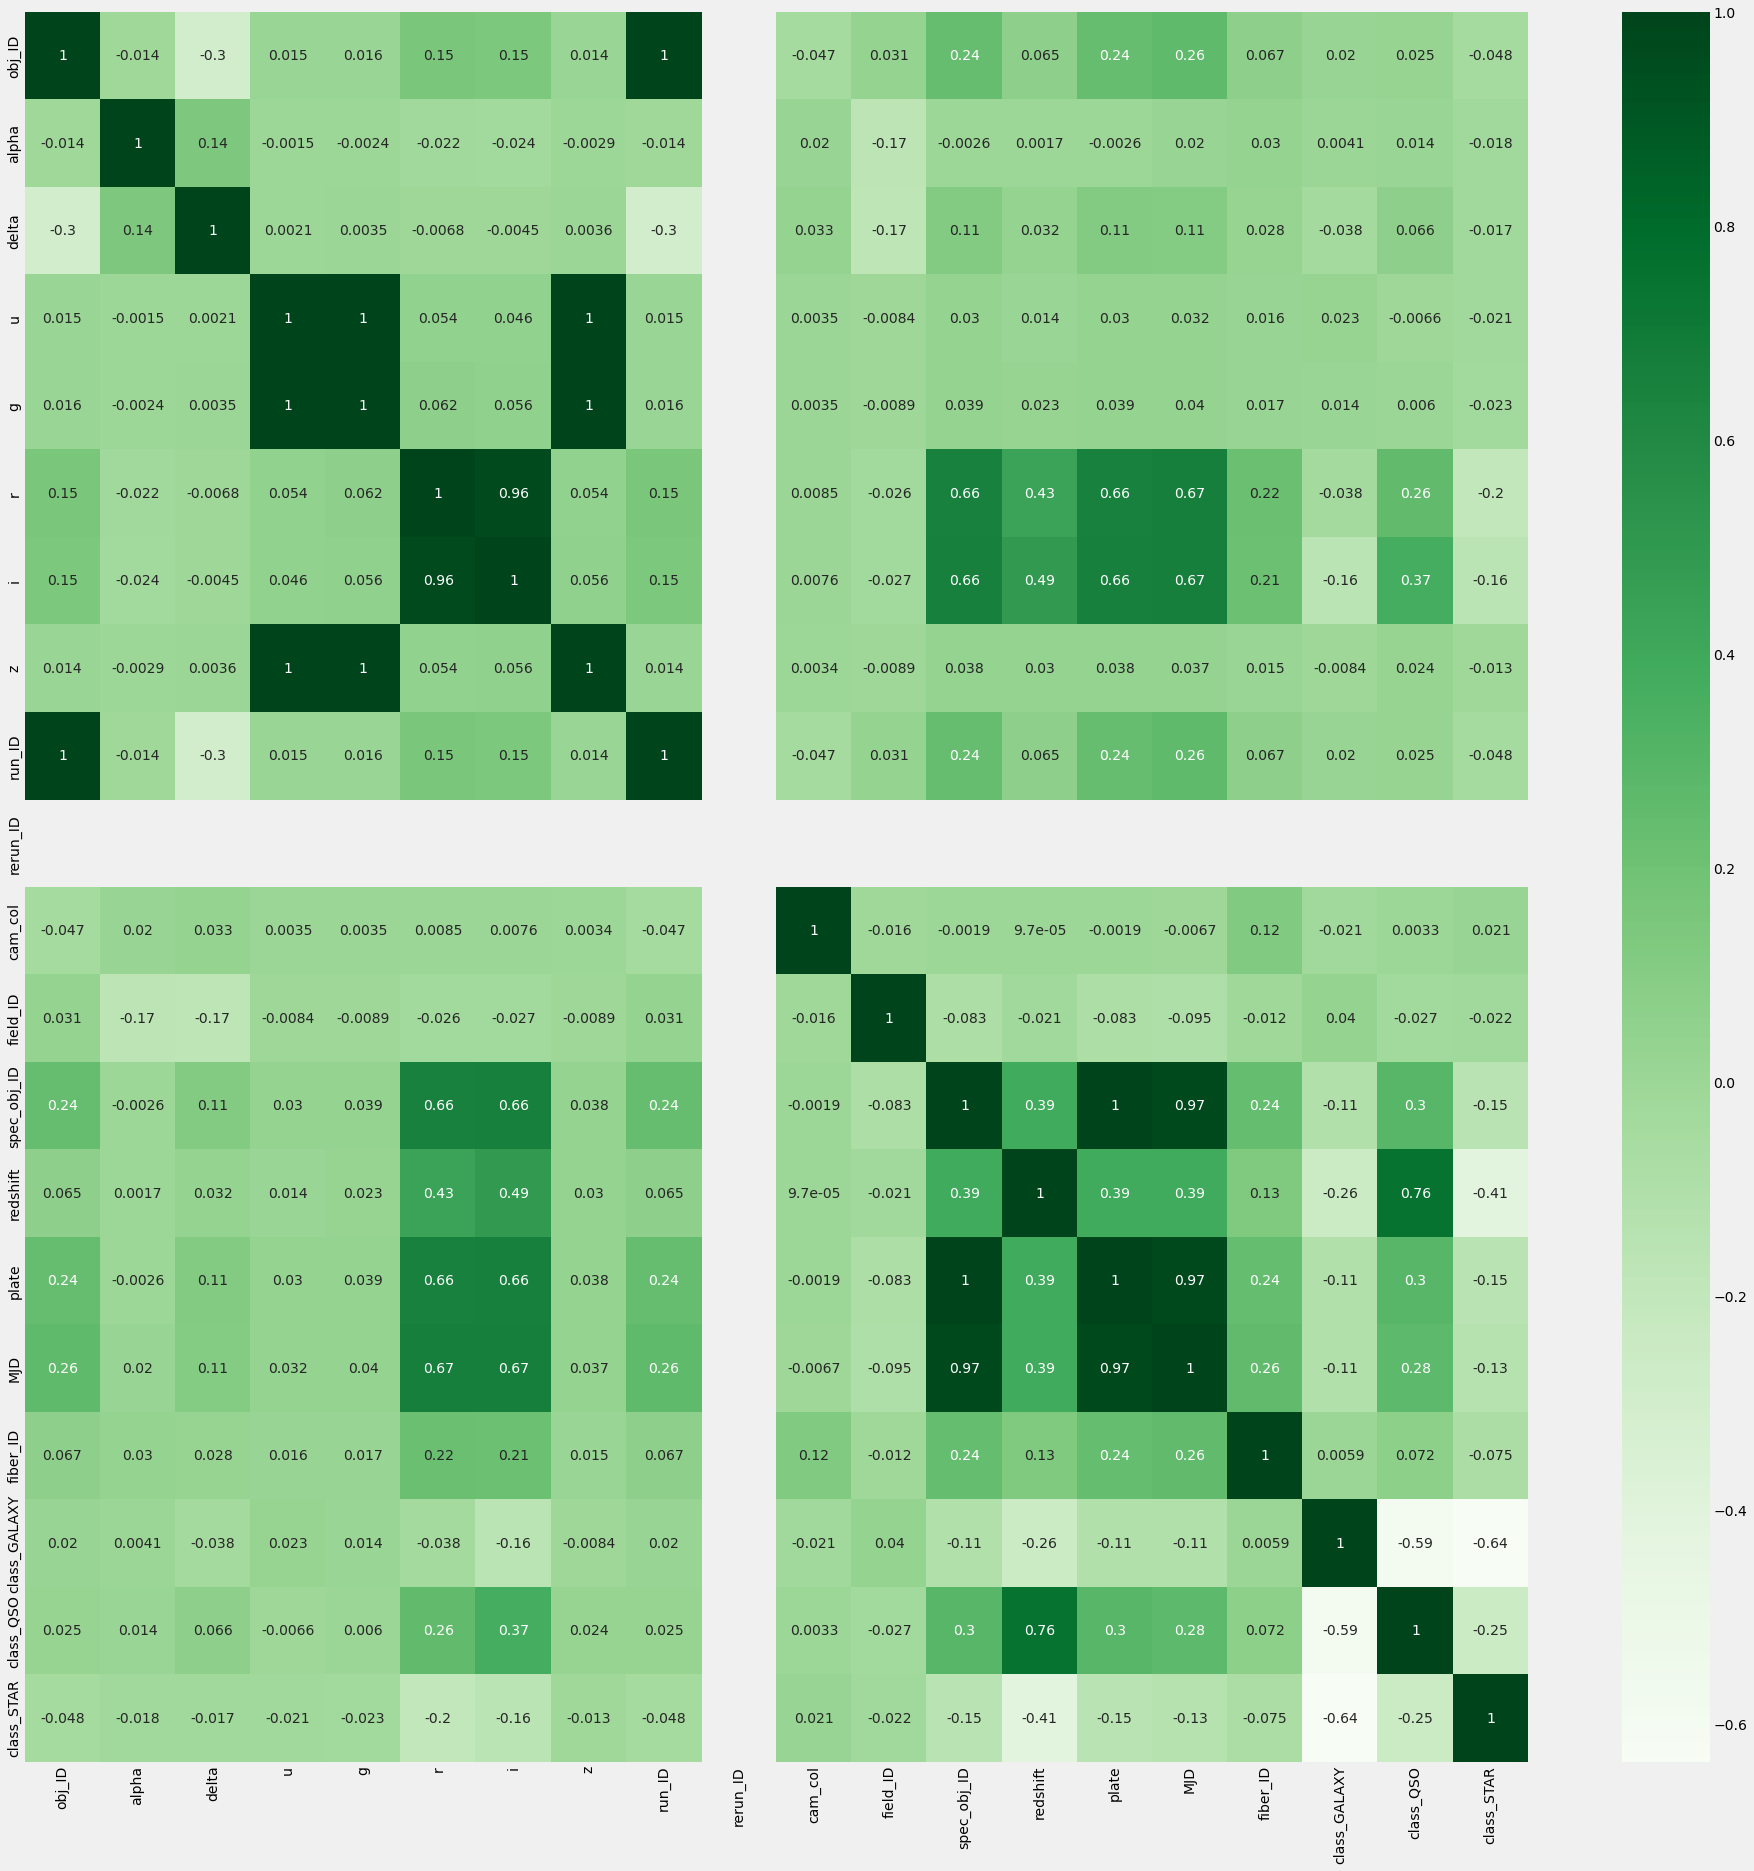

In [34]:
plt.figure(figsize=(30,30))
sns.heatmap(star_obj_removed.corr(), annot=True, cmap='Greens')

"MJD, plate, spec_obj_ID", "u,g,z" 셋 중 하나, i와 r 둘 중 하나만 남기려고 합니다. </br>
run_ID와 obj_ID도 완전히 동일한 값이라 하나만 남기려고 해요.

In [35]:
star_cor = star_obj_removed.drop(['MJD','spec_obj_ID','u','g','i','run_ID'], axis=1)

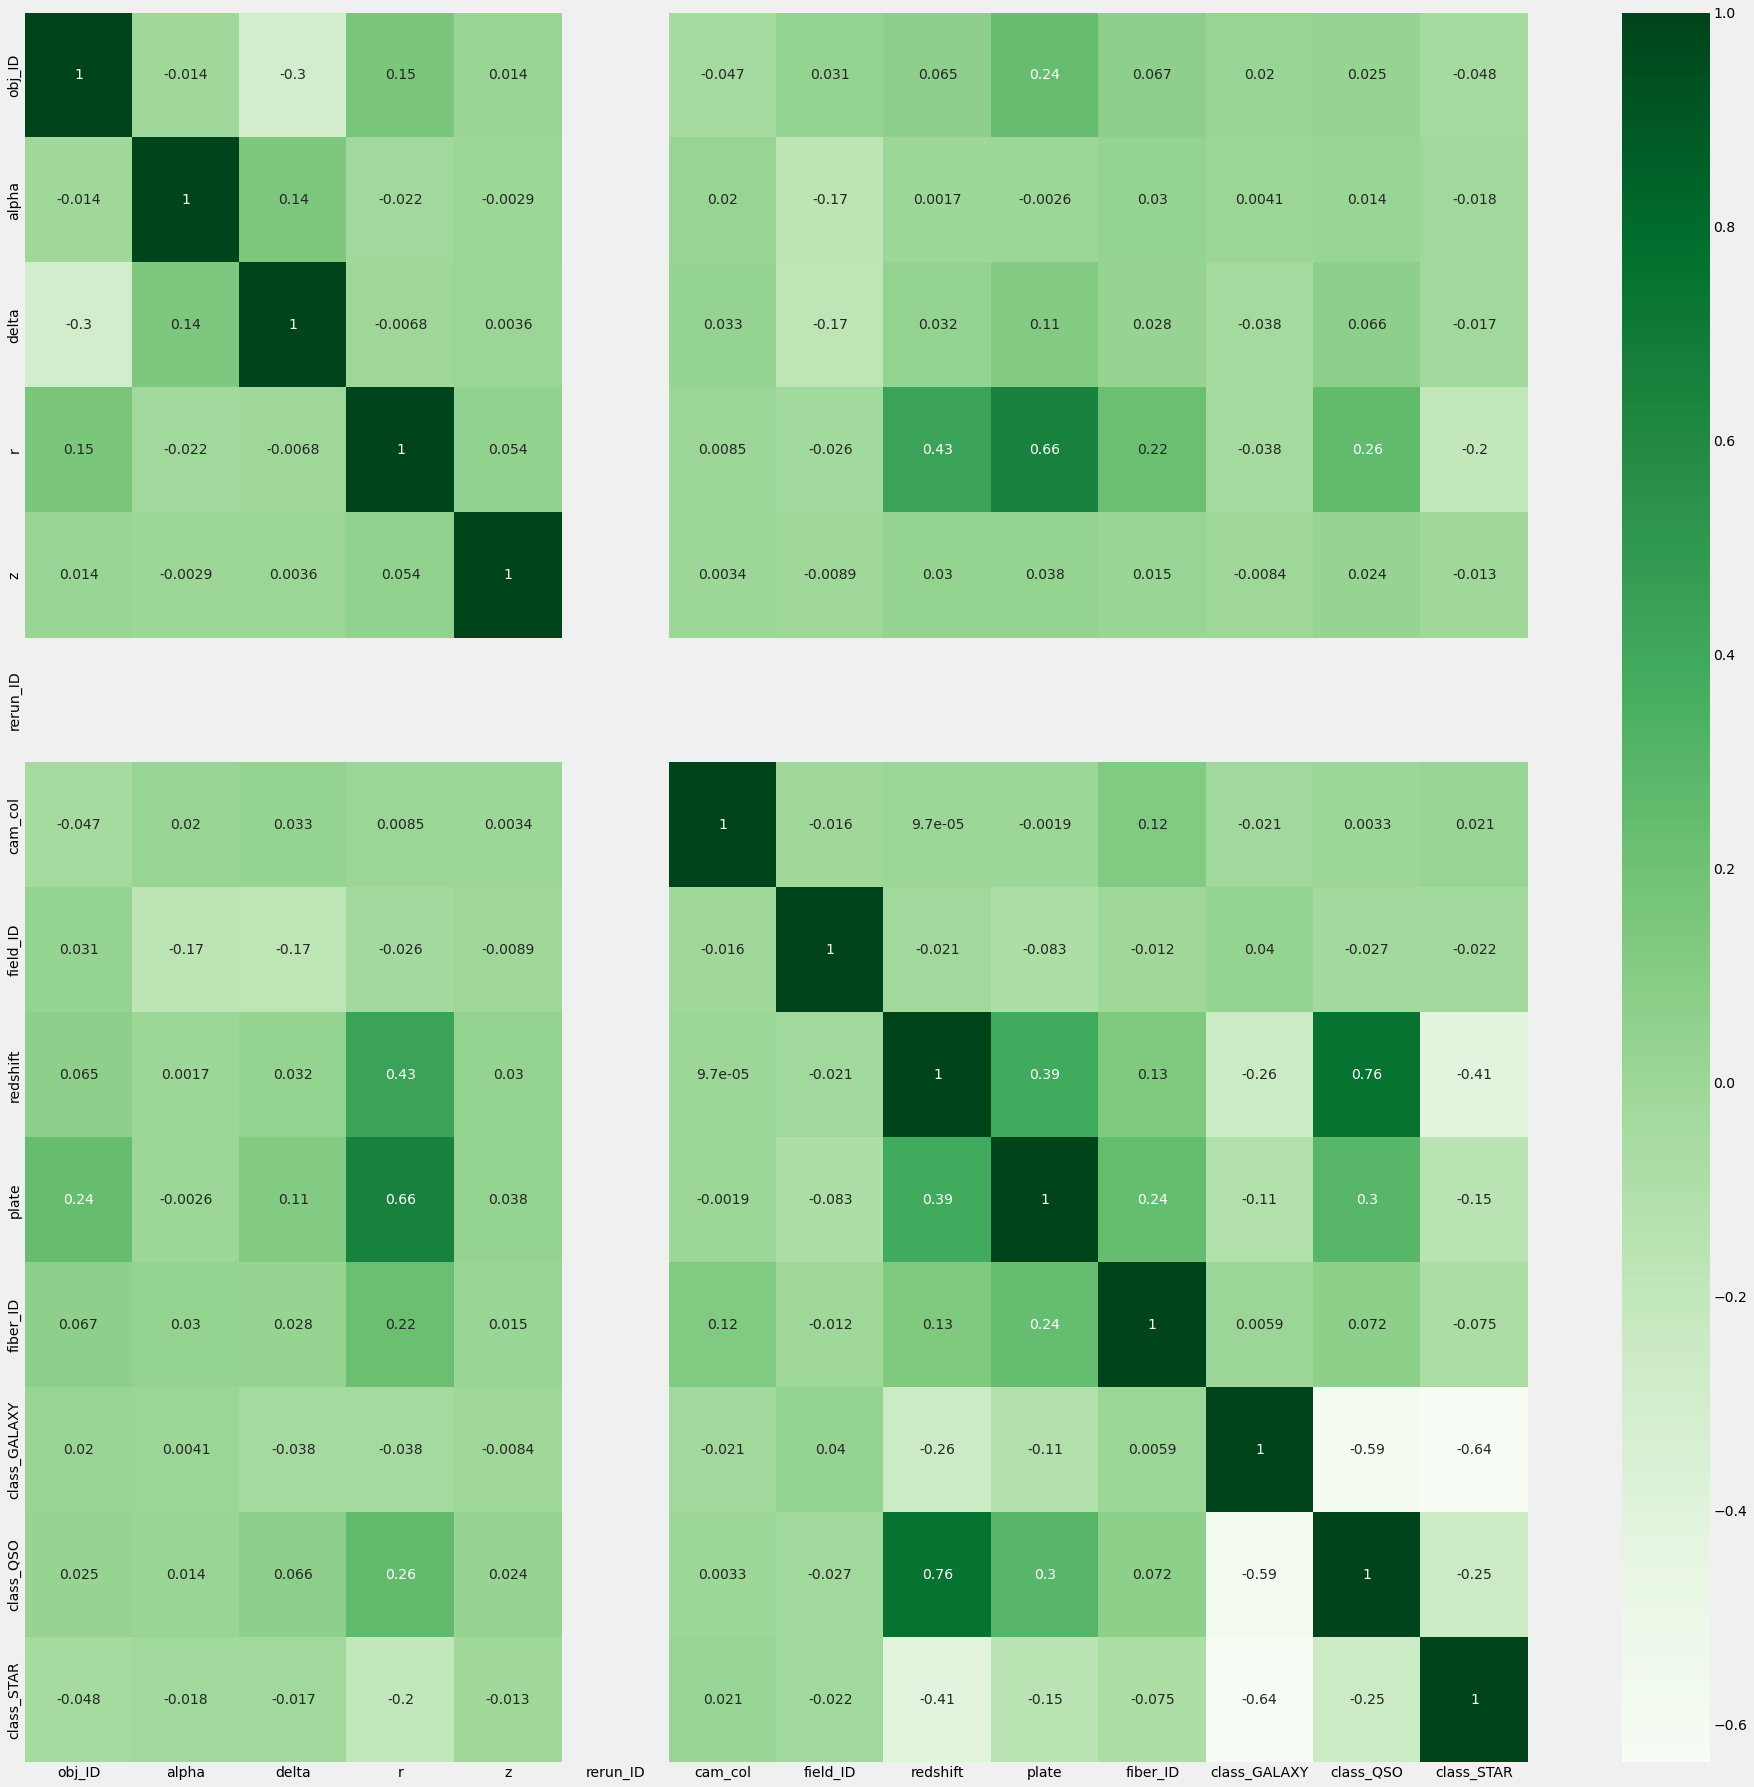

In [36]:
plt.figure(figsize=(30,30))
sns.heatmap(star_cor.corr(), annot=True, cmap='Greens')

0.9이상의 상관관계가 없어졌네요!

In [38]:
star_cor

,obj_ID,alpha,delta,r,z,rerun_ID,cam_col,field_ID,redshift,plate,fiber_ID,class_GALAXY,class_QSO,class_STAR
0,1.237661e+18,135.689107,32.494632,20.39501,18.79371,301,2,79,0.634794,5812,171,1,0,0
1,1.237665e+18,144.826101,31.274185,22.58444,21.61427,301,5,119,0.779136,10445,427,1,0,0
2,1.237661e+18,142.188790,35.582444,20.60976,18.94827,301,2,120,0.644195,4576,299,1,0,0
3,1.237663e+18,338.741038,-0.402828,21.61162,19.25010,301,3,214,0.932346,9149,775,1,0,0
4,1.237680e+18,345.282593,21.183866,16.49747,15.54461,301,3,137,0.116123,6121,842,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,21.90404,20.73569,301,2,581,0.000000,9374,438,1,0,0
99996,1.237679e+18,29.493819,19.798874,20.45003,19.41526,301,1,289,0.404895,7626,866,1,0,0
99997,1.237668e+18,224.587407,15.700707,18.20428,17.35221,301,4,308,0.143366,2764,74,1,0,0
99998,1.237661e+18,212.268621,46.660365,19.91386,18.62482,301,4,131,0.455040,6751,470,1,0,0
